In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 1st Derivative operator

In [2]:
def robert_edge_detection(img, t = 10):

    kernel_x = np.array([[-1,0],[0,1]])
    kernel_y = np.array([[0,-1],[1,0]])
    
    dst_x = cv2.filter2D(img,-1,kernel_x)
    dst_y = cv2.filter2D(img,-1,kernel_y)
    
    dst_x = dst_x.astype(float)
    dst_y = dst_y.astype(float)
    
    dst = np.abs(dst_x) + np.abs(dst_y)
    dst = dst.astype(int)
    
    mask = (np.abs(dst) > t)
    dst[mask] = 255
    dst[~mask] = 0
    
    return dst

def prewitt_edge_detection(img, t = 10):
    
    kernel_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    
    dst_x = cv2.filter2D(img,-1,kernel_x)
    dst_y = cv2.filter2D(img,-1,kernel_y)
    
    dst_x = dst_x.astype(float)
    dst_y = dst_y.astype(float)
    
    dst = np.abs(dst_x) + np.abs(dst_y)
    dst = dst.astype(int)
    
    mask = (np.abs(dst) > t)
    dst[mask] = 255
    dst[~mask] = 0
    
    return dst


def sobel_edge_detection(img, t = 10):
    
    kernel_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    kernel_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    
    dst_x = cv2.filter2D(img,-1,kernel_x)
    dst_y = cv2.filter2D(img,-1,kernel_y)
    
    dst_x = dst_x.astype(float)
    dst_y = dst_y.astype(float)
    
    dst = np.abs(dst_x) + np.abs(dst_y)
    dst = dst.astype(int)
    
    mask = (np.abs(dst) > t)
    dst[mask] = 255
    dst[~mask] = 0
    
    return dst

### 2st Derivative operator

In [58]:
def laplacianOFgaussian(img, size, std):
    
    blur = cv2.GaussianBlur(img, (size,size),std) 

    print(np.min(blur))
    print(np.max(blur))
    
    blur = blur.astype(float)
    
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])#laplacian operator
    laplace = cv2.filter2D(blur,-1,kernel)
    
    print(np.min(laplace))
    print(np.max(laplace))
    
    mask = np.empty(laplace.shape)
    
    mask = (laplace > 3)
    laplace[mask] = 255
    laplace[~mask] = 0
    
    laplace = laplace.astype(int)
    
    return laplace

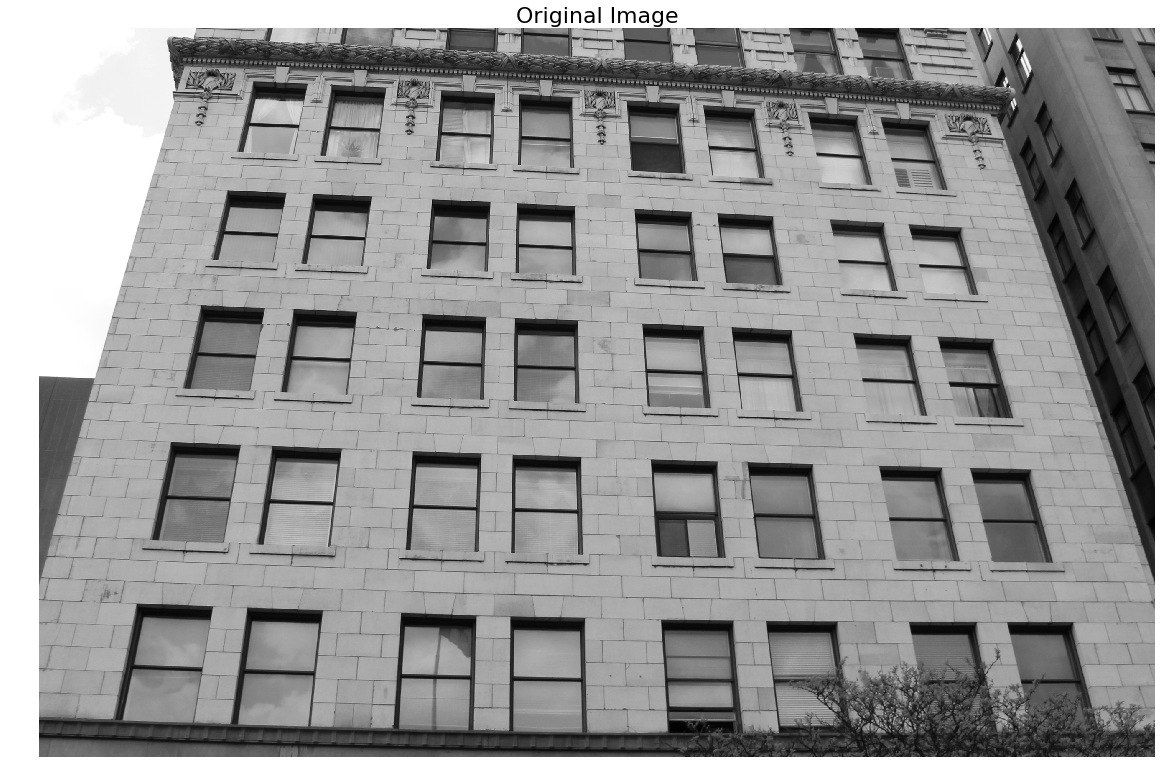

In [48]:
if __name__ == '__main__':
    
    img = cv2.imread("building1.png",0)

    #img = cv2.imread("flor.PNG",0)
    
    plt.figure(figsize=(20,20))

    plt.title('Original Image',fontsize=22)
    plt.axis("off")
    plt.imshow(img,'gray')


    plt.show()

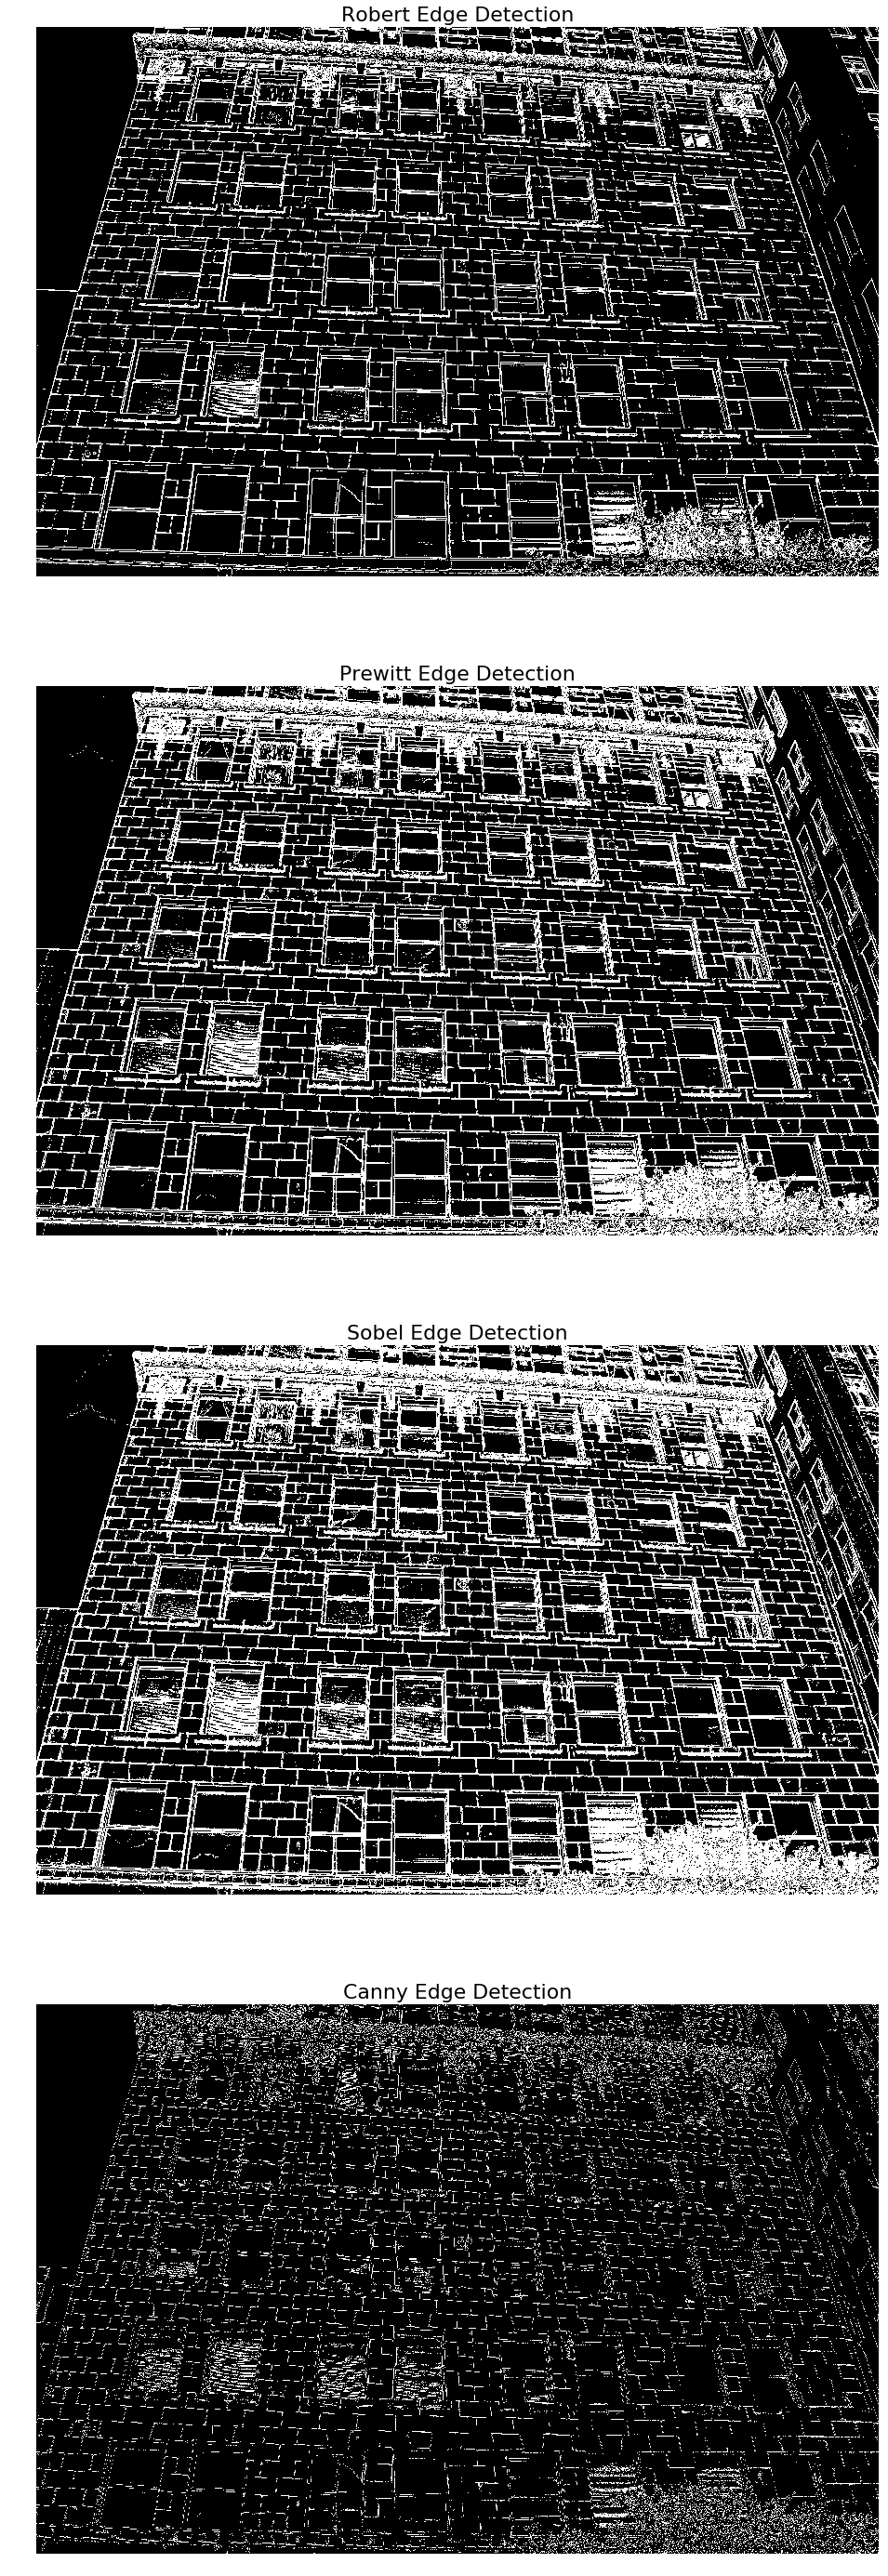

In [49]:
    blur = cv2.GaussianBlur(img,(3,3),1) #kernel size (3,3)

    blur = blur.astype(float)
    
    img_robert = robert_edge_detection(blur, 10)
    img_prewitt = prewitt_edge_detection(blur, 20)
    img_sobel = sobel_edge_detection(blur, 20)
    

    img_canny = cv2.Canny(img,10, 60)
    
    
    plt.figure(figsize=(50,50))
    plt.subplot(4,1,1)
    plt.title('Robert Edge Detection',fontsize=22)
    plt.axis("off")
    plt.imshow(img_robert,'gray')
    
    plt.subplot(4,1,2)
    plt.title('Prewitt Edge Detection',fontsize=22)
    plt.axis("off")
    plt.imshow(img_prewitt,'gray')

    plt.subplot(4,1,3)
    plt.title('Sobel Edge Detection',fontsize=22)
    plt.axis("off")
    plt.imshow(img_sobel,'gray')

    plt.subplot(4,1,4)
    plt.title('Canny Edge Detection',fontsize=22)
    plt.axis("off")
    plt.imshow(img_canny,'gray')
    #plt.savefig('canny.png', bbox_inches='tight')


    plt.show()

4
255
-61.0
60.0


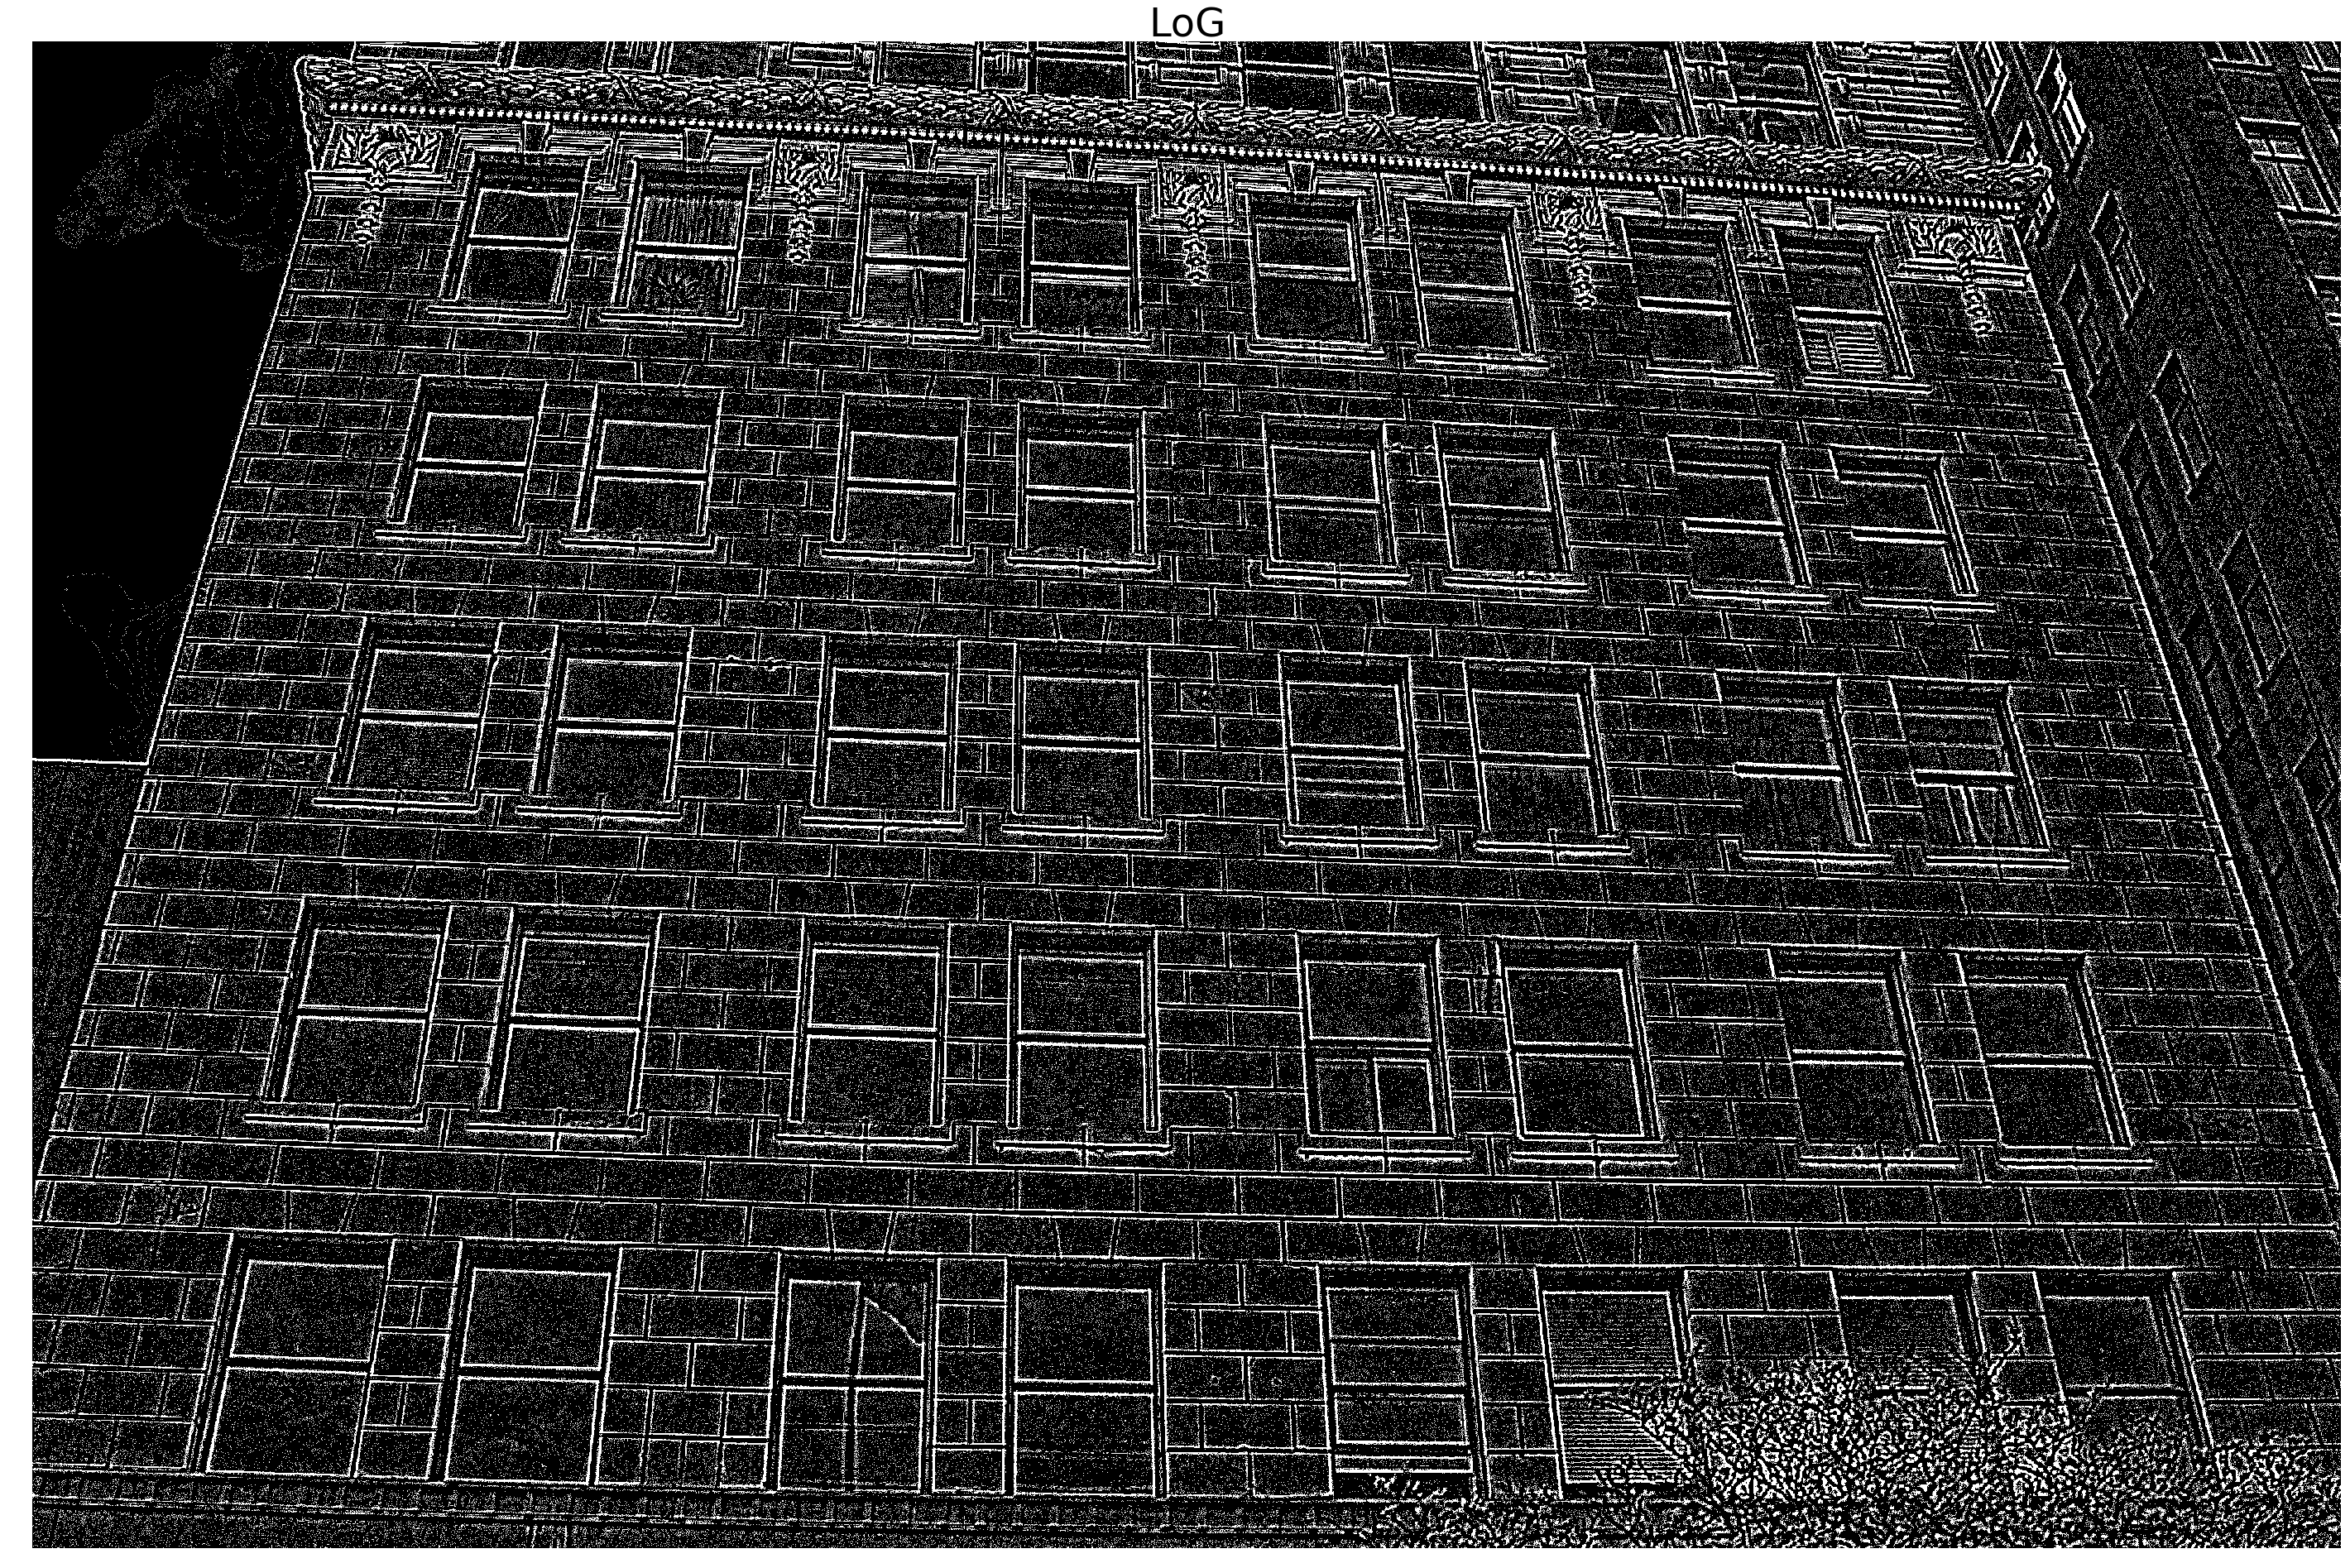

In [59]:
laplace = laplacianOFgaussian(img, 7, 5)


plt.figure(figsize=(50,50))
plt.title('LoG',fontsize=48)
plt.axis("off")
plt.imshow(laplace,'gray')
#plt.savefig('log.png', bbox_inches='tight')
cv2.imwrite('laplace.png',laplace)

plt.show()